In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

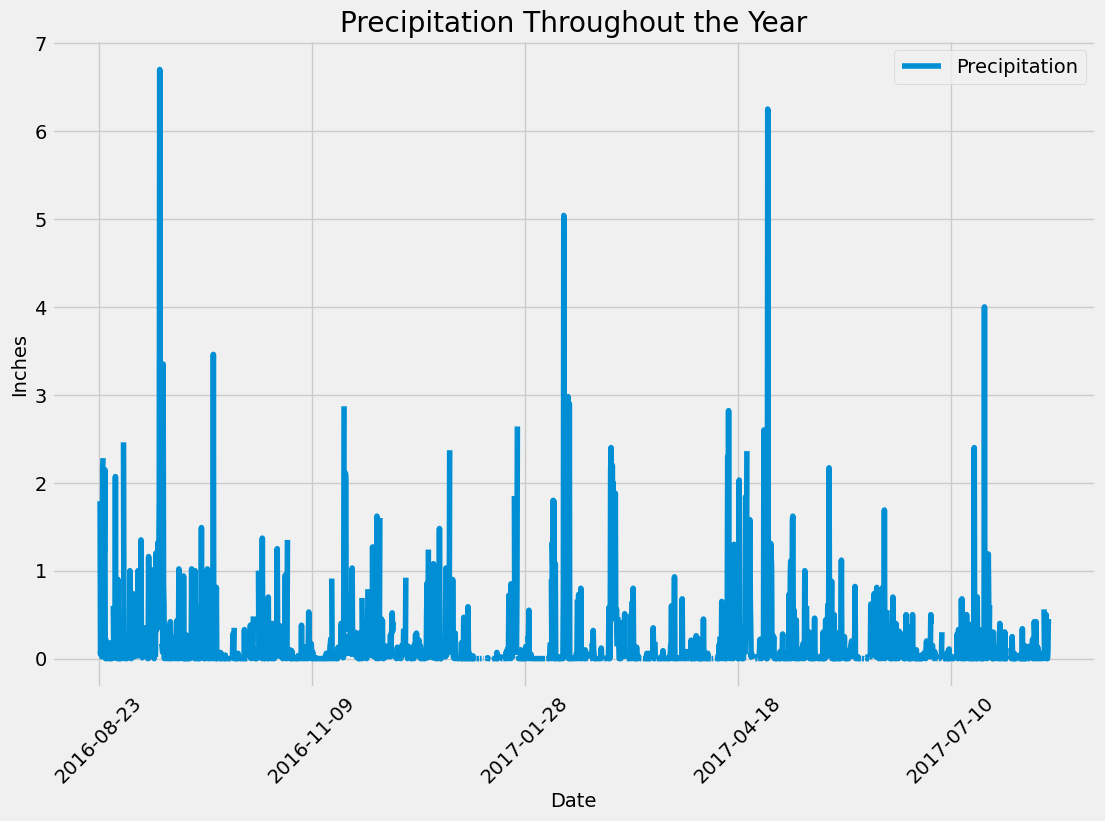

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
one_year_ago = recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_query)
prcp_df = prcp_df.rename(columns = {"prcp" : "Precipitation",
                                   "date" : "Date"})

# Sort the dataframe by Date
prcp_df = prcp_df.sort_values(by = ["Date"])

# Set the index to the Date column
prcp_df = prcp_df.set_index('Date')


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot = 45, figsize = (12,8))
plt.legend(loc = 'upper right')
plt.xlabel('Date')
plt.ylabel('Percipitation (Inches)')
plt.title('Precipitation Throughout the Year')
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,
                    func.count(Measurement.id)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, 
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
most_active= session.query(*sel).filter_by(station = "USC00519281").all()
most_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

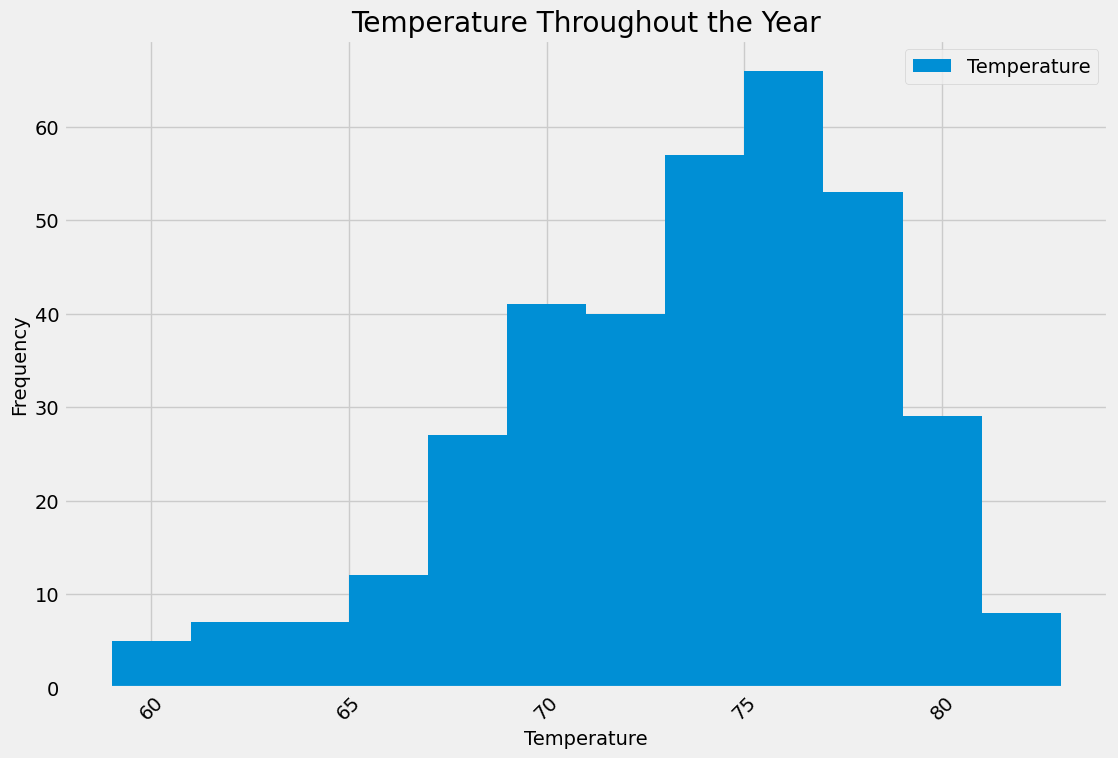

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_query = session.query(Measurement.date, Measurement.tobs).\
            filter_by(station = "USC00519281").\
            filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
tobs_df = pd.DataFrame(tobs_query)
tobs_df = tobs_df.rename(columns = {"tobs" : "Temperature",
                                   "date" : "Date"})

# Sort the dataframe by Date
tobs_df = tobs_df.sort_values(by = ["Date"])

# Set the index to the Date column
tobs_df = tobs_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
tobs_df.plot(kind = "hist", bins = 12, rot = 45, figsize = (12,8))
plt.legend(loc = 'upper right')
plt.xlabel('Temperature')
plt.title('Temperature Throughout the Year')
plt.show()

# Close Session

In [19]:
# Close Session
session.close()